# WeatherPy
----
#### Analyis
Observed Trends
1.  In the plots summarizing all cities in the data set, it appears that temperature tends to be the highest near the equator, which makes sense. Wind speed appears to be evenly distributed based on latitude which is interesting, I would have predicted there would be more wind in certain areas versus others.
2.  The correlation between temperature and latitude in the northern hemisphere is much stronger than in the southern, but this could be in part because the southern hemisphere has less data points in this sample set. There is still reasonable correlation in the southern hemisphere and it is opposite of northern which makes sense.
3.  There does not appear to be much correlation between latitude and % humidity, cloudiness or windspeed for either hemisphere, but the data is still fun to look at!


In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# import API key
from api_keys import weather_api_key

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# view list of cities, commenting this out for submission since it is a long output
# cities

In [3]:
# save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_updated = []
latitude = []
longitude = []
country = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# loop through the list of cities and perform a request for data on each, numbering each city
print(f"Beginning Data Retrieval")
print("-------------------------")
for num, city in enumerate(cities, start=1):
    response = requests.get(query_url + city).json()
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']["humidity"])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        # updated city list to omit keys that are not found/have no data
        cities_updated.append(city)
        # print each city with log
        print(f"Processing {num}, City: {city}")
    
    except KeyError:
        print("City not found, skipping")
print("-------------------------")    
print(f"Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing 1, City: mataura
Processing 2, City: brae
City not found, skipping
Processing 4, City: maldonado
Processing 5, City: rikitea
Processing 6, City: bluff
Processing 7, City: wajima
Processing 8, City: hobart
Processing 9, City: porto novo
Processing 10, City: bredasdorp
Processing 11, City: pouembout
Processing 12, City: avarua
Processing 13, City: choya
Processing 14, City: atuona
Processing 15, City: sargatskoye
Processing 16, City: severo-kurilsk
Processing 17, City: thompson
Processing 18, City: pompeia
Processing 19, City: adrar
Processing 20, City: filingue
Processing 21, City: ribeira grande
City not found, skipping
Processing 23, City: san quintin
Processing 24, City: moree
City not found, skipping
Processing 26, City: castro
Processing 27, City: souillac
Processing 28, City: tasiilaq
Processing 29, City: rio gallegos
Processing 30, City: weihai
Processing 31, City: galle
Processing 32, City: kaitangata
Processing 33, C

Processing 270, City: shahpura
Processing 271, City: shingu
Processing 272, City: alice springs
Processing 273, City: tuatapere
City not found, skipping
Processing 275, City: la romana
Processing 276, City: dunedin
Processing 277, City: egvekinot
City not found, skipping
Processing 279, City: banff
Processing 280, City: aripuana
City not found, skipping
Processing 282, City: joshimath
Processing 283, City: omboue
Processing 284, City: vangaindrano
Processing 285, City: chuy
Processing 286, City: langres
Processing 287, City: batu
City not found, skipping
Processing 289, City: te anau
Processing 290, City: salym
City not found, skipping
Processing 292, City: airai
Processing 293, City: torbay
Processing 294, City: kilindoni
Processing 295, City: mountain home
Processing 296, City: faya
City not found, skipping
Processing 298, City: anloga
Processing 299, City: ileza
Processing 300, City: anadyr
Processing 301, City: chifeng
Processing 302, City: pacific grove
Processing 303, City: lasa


City not found, skipping
Processing 539, City: sabang
Processing 540, City: la ronge
Processing 541, City: huarmey
Processing 542, City: alberton
Processing 543, City: port augusta
Processing 544, City: mabaruma
Processing 545, City: areosa
Processing 546, City: banjar
Processing 547, City: ames
City not found, skipping
Processing 549, City: okakarara
Processing 550, City: dicabisagan
Processing 551, City: rovinj
Processing 552, City: lisala
Processing 553, City: ciudad bolivar
Processing 554, City: ambositra
Processing 555, City: havre-saint-pierre
Processing 556, City: plouzane
Processing 557, City: sigli
City not found, skipping
Processing 559, City: porto velho
Processing 560, City: gulf gate estates
Processing 561, City: clyde river
Processing 562, City: luderitz
Processing 563, City: gubkinskiy
Processing 564, City: erdenet
Processing 565, City: rafaela
City not found, skipping
Processing 567, City: cabo san lucas
City not found, skipping
Processing 569, City: shenjiamen
Processi

In [6]:
# confirm lists are all same length for data frame
print(len(cities_updated),
len(latitude),
len(longitude),
len(country),
len(temperature),
len(humidity),
len(cloudiness),
len(wind_speed))

562 562 562 562 562 562 562 562


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# define dictionary with lists created in loop above
weather_dict = {
    "City": cities_updated,
    "Latitude": latitude,
    "Longitude": longitude,
    "Country": country,
    "Temperature": temperature,
    "% Humidity": humidity,
    "% Cloudiness": cloudiness,
    "Wind Speed (mph)": wind_speed
}

# save dictionary in data frame and show first five rows
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Longitude,Country,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
0,mataura,-46.1927,168.8643,NZ,47.48,97,9,2.35
1,brae,60.3964,-1.3530,GB,43.12,78,100,10.36
2,maldonado,-34.6667,-54.9167,UY,61.99,55,0,13.47
3,rikitea,-23.1203,-134.9692,PF,77.97,69,31,18.25
4,bluff,-46.6000,168.3333,NZ,47.80,86,21,11.95


In [8]:
# define output file (csv)
output_data_file = "../output_data/cities.csv"

# saving the dataframe to csv
weather_df.to_csv(output_data_file)

In [9]:
# view stats on data frame
weather_df.describe()

,Latitude,Longitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,20.094300,17.628328,59.272349,71.094306,59.181495,8.349715
std,33.391048,92.392777,23.398623,22.820856,39.697732,6.205026
min,-54.800000,-179.166700,-23.690000,1.000000,0.000000,0.000000
25%,-7.340100,-65.135800,44.312500,58.000000,20.000000,4.000000
50%,22.384400,19.045950,63.645000,76.500000,72.000000,6.805000
75%,48.000950,96.319175,78.952500,89.000000,100.000000,11.500000
max,78.218600,179.316700,99.000000,100.000000,100.000000,33.260000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
# max humidity is 100% so skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

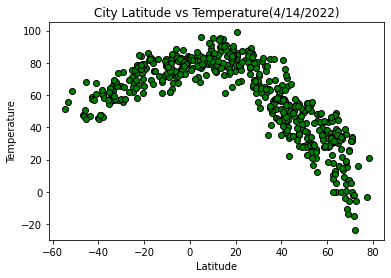

In [11]:
# create a Scatter Plot for latitude vs temp
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs Temperature(4/14/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvstemp.png")
plt.show()

## Latitude vs. Humidity Plot

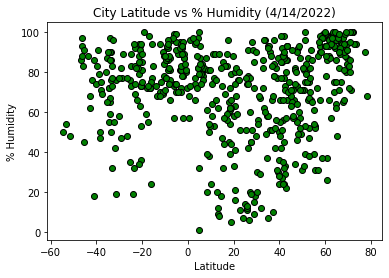

In [12]:
# create a Scatter Plot for latitude vs % humidity
x_values = weather_df['Latitude']
y_values = weather_df['% Humidity']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("City Latitude vs % Humidity (4/14/2022)")

# show plot and save to output file
plt.savefig("../output_data/north_latvshum.png")
plt.show()

## Latitude vs. Cloudiness Plot

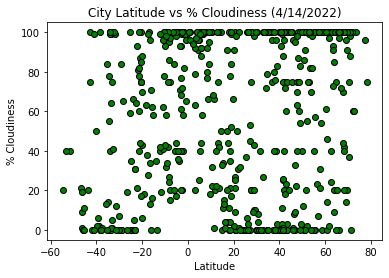

In [13]:
# create a Scatter Plot for latitude vs % cloudiness
x_values = weather_df['Latitude']
y_values = weather_df['% Cloudiness']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("City Latitude vs % Cloudiness (4/14/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

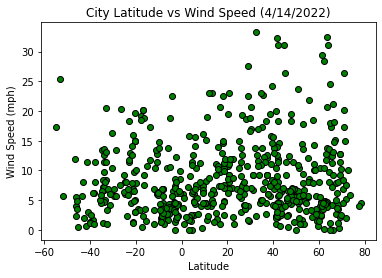

In [14]:
# create a Scatter Plot for latitude vs wind speed
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed (mph)']
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs Wind Speed (4/14/2022)")

# show plot and save to output file
plt.savefig("../output_data/latvswind.png")
plt.show()

## Linear Regression

In [15]:
#oops, forgot dependecy for stats! here it is
from scipy import stats

# define data frames for north and south hemispheres
north_hem_df = weather_df[weather_df["Latitude"] >= 0]
south_hem_df = weather_df[weather_df["Latitude"] <0]
north_hem_df.head()

,City,Latitude,Longitude,Country,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
1,brae,60.3964,-1.3530,GB,43.12,78,100,10.36
5,wajima,37.4000,136.9000,JP,51.62,96,100,12.15
7,porto novo,6.4965,2.6036,BJ,82.22,78,99,10.49
11,choya,52.0108,86.5467,RU,30.51,81,2,5.01
13,sargatskoye,55.6101,73.4972,RU,48.47,53,57,8.59


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7818804200908479


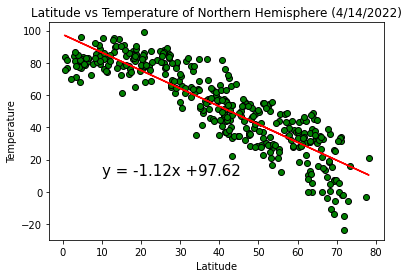

In [18]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Temperature']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature of Northern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(10,10),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvstemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.621255346749363


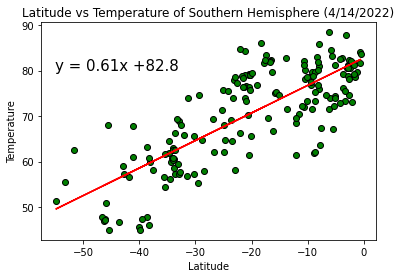

In [20]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Temperature']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs Temperature of Southern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(-55,80),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvstemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0980059167714786


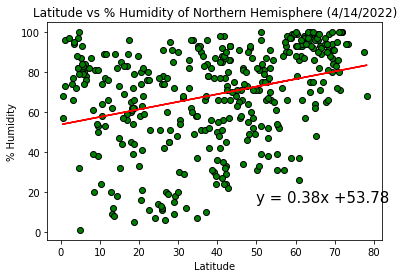

In [21]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Humidity']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Latitude vs % Humidity of Northern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(50,15),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvshum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08802641022057603


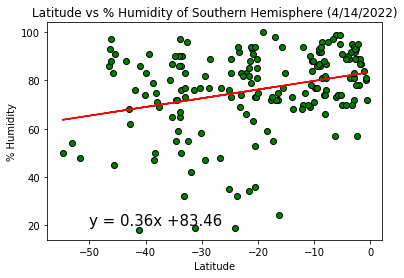

In [22]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Humidity']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title("Latitude vs % Humidity of Southern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01642674800934754


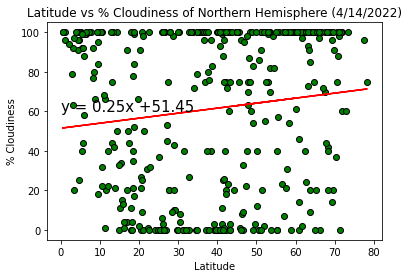

In [23]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Cloudiness']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Latitude vs % Cloudiness of Northern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(0,60),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvscloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1639376255192034


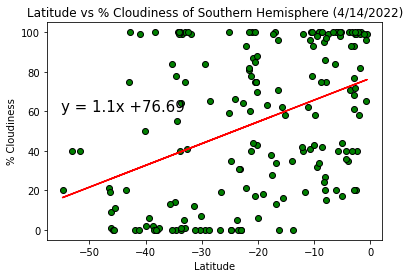

In [25]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Cloudiness']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.title("Latitude vs % Cloudiness of Southern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(-55,60),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvscloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0010158456702182362


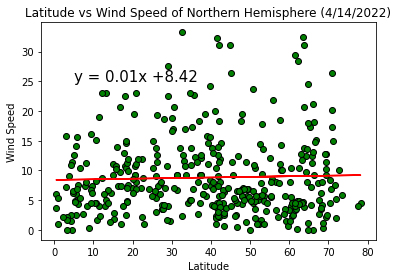

In [27]:
# define x and y values for plot
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind Speed (mph)']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed of Northern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(5,25),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/north_latvswind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012236017898970766


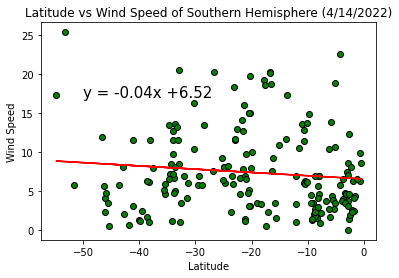

In [29]:
# define x and y values for plot
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind Speed (mph)']

# perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# get regression values
regress_values = x_values * slope + intercept

# create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# create plot
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed of Southern Hemisphere (4/14/2022)")
plt.annotate(line_eq,(-50,17),fontsize=15,color="black")

# print r value
print(f"The r-value is: {rvalue**2}")

# show plot and save to output file
plt.savefig("../output_data/south_latvswind.png")
plt.show()